In [1]:
import sys

print(sys.executable)


/jup/.venv/bin/python3


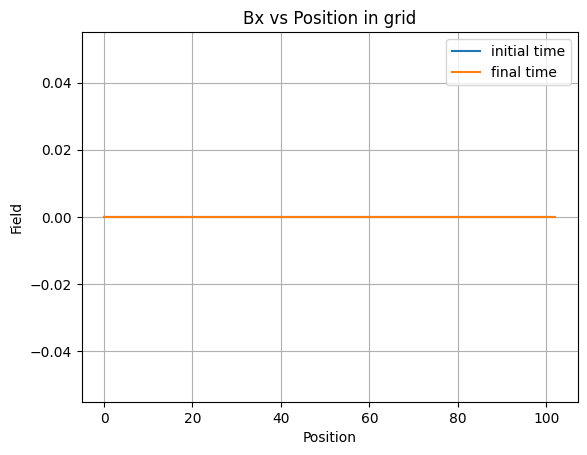

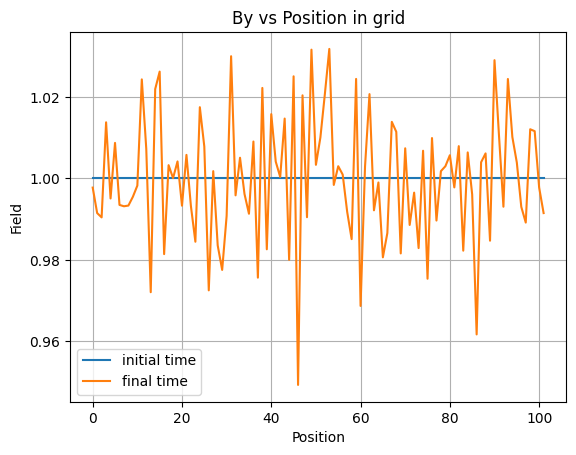

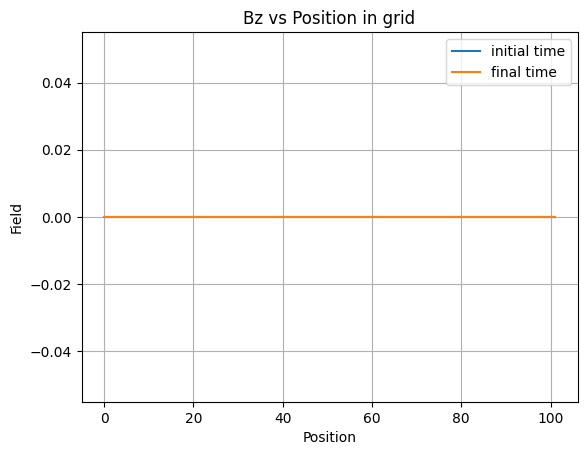

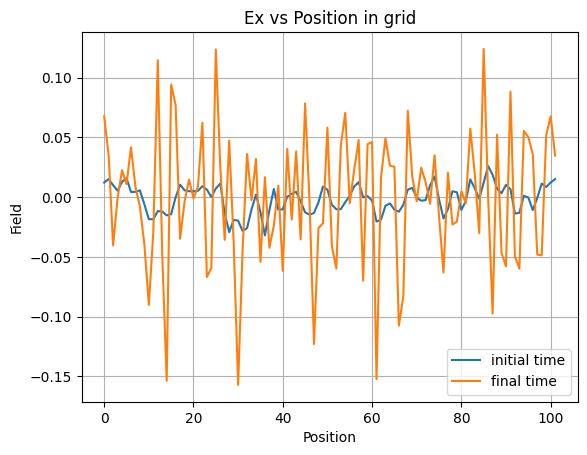

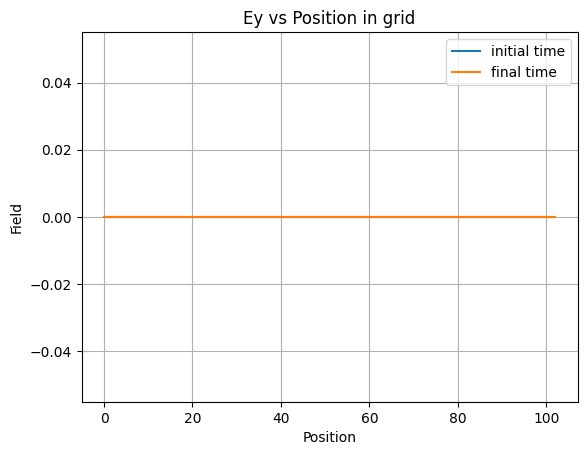

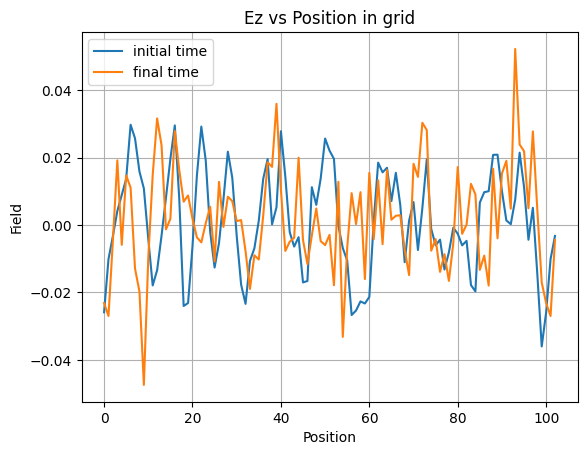

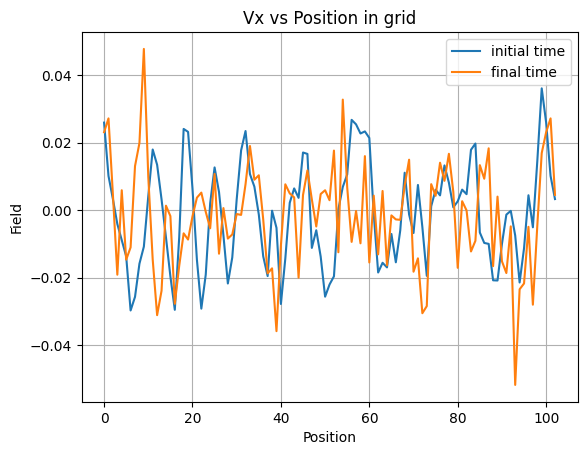

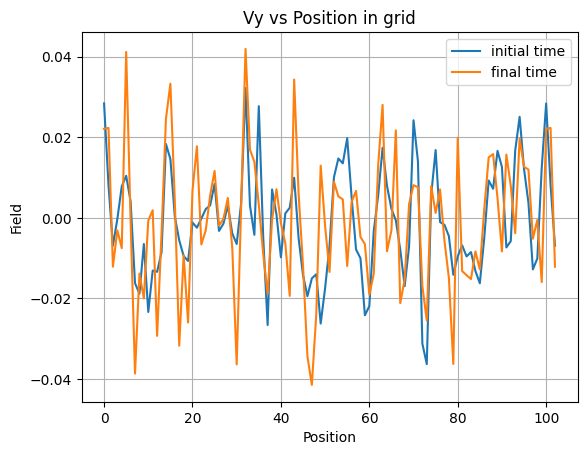

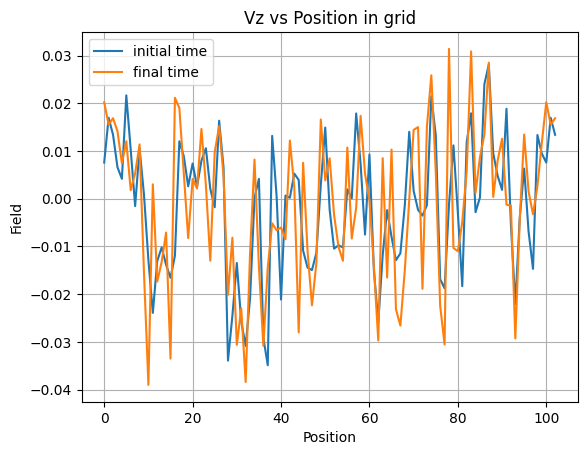

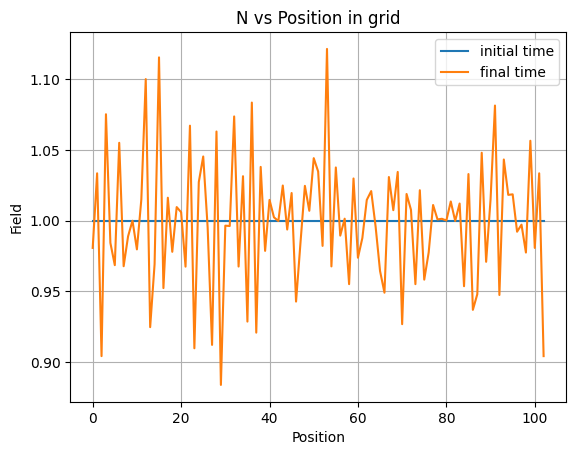

In [49]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

filename = "fields.h5"

times = []
fields_names = ["Bx", "By", "Bz", "Ex", "Ey", "Ez", "Vx", "Vy", "Vz", "N"]
fields_arrays = [[], [], [], [], [], [], [], [], [], [], []]

with h5py.File("fields.h5", "r") as f:
    t_group = f["/t"]
    for time_str in sorted(t_group.keys()):
        times.append(float(time_str))
        for i, name in enumerate(fields_names):
            load = f[f"/t/{time_str}/{name}"][()]
            fields_arrays[i].append(load)

# Plot
for i in range(len(fields_names)):
    plt.plot(fields_arrays[i][0], label='initial time')
    plt.plot(fields_arrays[i][-1], label='final time')
    plt.xlabel("Position")
    plt.ylabel("Field")
    plt.title(f"{fields_names[i]} vs Position in grid")
    plt.legend()
    plt.grid(True)
    plt.show()

We can see that the electric and magnetic fields remain stable throughout the simulation, and the total density remains constant and equal to 1. Note that these outputs correspond to the initial conditions B = (0, 1, 0) and E = (0, 0, 0).